In [8]:
import pickle
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop(train[(train['mean_slope'] == "--") | (train['std_slope'] == "--")].index, inplace=True)
test.drop(test[(test['mean_slope'] == "--") | (test['std_slope'] == "--")].index, inplace=True)

X_train = train.drop(columns=['image_file', 'label'])
y_train = train['label']

X_test = test.drop(columns=['image_file', 'label'])
y_test = test['label']

In [4]:
svc = pickle.load(open('./models/svc.pkl', 'rb'))
dt = pickle.load(open('./models/dt.pkl', 'rb'))

SVM results:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       674
           1       0.23      0.30      0.26       142

    accuracy                           0.71       816
   macro avg       0.54      0.55      0.54       816
weighted avg       0.74      0.71      0.72       816

Confusion Matrix:


<Axes: >

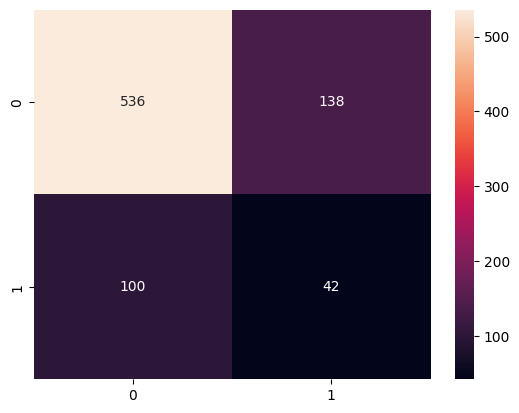

In [5]:
y_pred = svc.predict(X_test)
print("SVM results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

DecisionTree results:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       674
           1       0.34      0.32      0.33       142

    accuracy                           0.77       816
   macro avg       0.60      0.59      0.60       816
weighted avg       0.77      0.77      0.77       816

Confusion Matrix:


<Axes: >

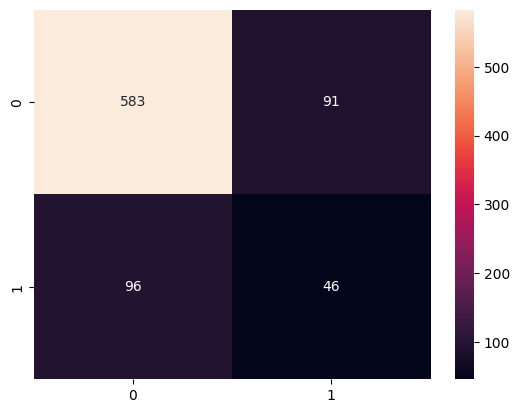

In [6]:
y_pred = dt.predict(X_test)
print("DecisionTree results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

model.load_weights('./models/nn.h5')

26/26 [==============================] - 2s 2ms/step
MLP results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       674
           1       0.27      0.48      0.35       142

    accuracy                           0.69       816
   macro avg       0.57      0.61      0.57       816
weighted avg       0.77      0.69      0.72       816

Confusion Matrix:


<Axes: >

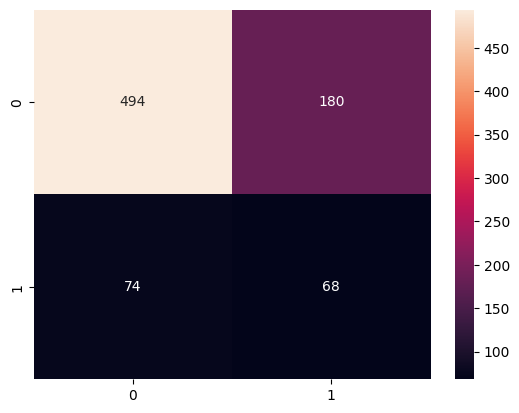

In [9]:
y_pred = model.predict(np.asarray(X_test).astype('float32'))
y_pred_binary = np.round(y_pred)

print("MLP results:")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred_binary),annot = True,fmt='d')